In [1]:
import dreams.utils.spectra as su
from bertviz import head_view, model_view
import torch
import pandas as pd
import plotly.express as px
import molplotly
import torch
torch.set_printoptions(sci_mode=False)
import umap
from collections import Counter
import seaborn as sns
import dreams.utils.data as du
import dreams.utils.mols as mu
from rdkit import Chem
from tqdm import tqdm
from dreams.definitions import NIST20, PRETRAINED, MONA
from dreams.utils.dformats import DataFormatA
from dreams.models.dreams.dreams import DreaMS, get_embeddings
from dreams.utils.mols import formula_to_dict
import dreams.utils.plots as plots
plots.init_plotting()
%load_ext autoreload
%autoreload 2

TODO: analyze further i = 2, peak at 161 m/z (df_idx=[13464, 17836, 13461, 13467, 13443])

In [2]:
df = pd.read_pickle(MONA / 'mona_clean_A.pkl')
df['SMILES'].value_counts()

Cc1cc(NS(=O)(=O)c2ccc(N)cc2)no1                         114
N=C(N)N=C(O)c1nc(Cl)c(N)nc1N                             91
Cc1nc(NS(=O)(=O)c2ccc(N)cc2)oc1C                         86
CN(C)CCC=C1c2ccccc2CSc2ccccc21                           73
CN(CC1(C)CCCO1)S(=O)(=O)c1ccc(Cl)c(S(N)(=O)=O)c1         67
                                                       ... 
N=C(O)N1c2ccccc2CC(=O)c2ccccc21                           1
CN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F)F)cc32)CC1              1
NC1CCN(c2nc3c(cc2F)c(=O)c(C(=O)O)cn3-c2ccc(F)cc2F)C1      1
Cc1ccc(O)c([C@H](CCN(C(C)C)C(C)C)c2ccccc2)c1              1
Cc1ccc(N)c(S(=O)(=O)O)c1                                  1
Name: SMILES, Length: 5807, dtype: int64

In [3]:
idx = df[df['SMILES'] == 'CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1'].index

/Users/roman/miniconda/envs/msml39/lib/python3.9/site-packages/pytorch_lightning/utilities/migration/utils.py:49: PossibleUserWarning: The loaded checkpoint was produced with Lightning v2.0.5, which is newer than your current Lightning version: v2.0.2
  rank_zero_warn(
100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

torch.Size([19, 61, 1024])


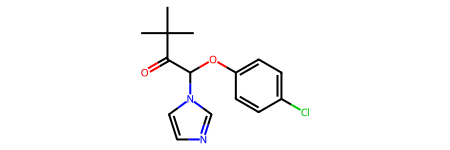

NAME                                           SYNONYMS  \
2612   Climbazole  1-(4-chlorophenoxy)-1-imidazol-1-yl-3,3-dimeth...   
17187   Climbazol  Climbazole\n1-(4-chloranylphenoxy)-1-imidazol-...   
17188   Climbazol  Climbazole\n1-(4-chloranylphenoxy)-1-imidazol-...   
17189   Climbazol  Climbazole\n1-(4-chloranylphenoxy)-1-imidazol-...   
17190   Climbazol  Climbazole\n1-(4-chloranylphenoxy)-1-imidazol-...   
17191   Climbazol  Climbazole\n1-(4-chloranylphenoxy)-1-imidazol-...   
17192   Climbazol  Climbazole\n1-(4-chloranylphenoxy)-1-imidazol-...   
17193   Climbazol  Climbazole\n1-(4-chloranylphenoxy)-1-imidazol-...   
17194   Climbazol  Climbazole\n1-(4-chloranylphenoxy)-1-imidazol-...   
17195   Climbazol  Climbazole\n1-(4-chloranylphenoxy)-1-imidazol-...   
17196   Climbazol  Climbazole\n1-(4-chloranylphenoxy)-1-imidazol-...   
17197   Climbazol  Climbazole\n1-(4-chloranylphenoxy)-1-imidazol-...   
17198   Climbazol  Climbazole\n1-(4-chloranylphenoxy)-1-imidazol-...   
21582   Climbazol  Climbazole\n1-(4-chlorophenoxy)-1-imidazol-1-y...   
21583   Climbazol  Climbazole\n1-(4-chlorophenoxy)-1-imidazol-1-y...   
21584   Climbazol  Climbazole\n1-(4-chlorophenoxy)-1-imidazol-1-y...   
21585   Climbazol  Climbazole\n1-(4-chlorophenoxy)-1-imidazol-1-y...   
21586   Climbazol  Climbazole\n1-(4-chlorophenoxy)-1-imidazol-1-y...   
21587   Climbazol  Climbazole\n1-(4-chlorophenoxy)-1-imidazol-1-y...   

      PRECURSOR TYPE SPECTRUM TYPE  PRECURSOR M/Z INSTRUMENT TYPE  \
2612          [M+H]+           MS2       293.1051      LC-ESI-QFT   
17187         [M+H]+           MS2       293.1051     LC-ESI-ITFT   
17188         [M+H]+           MS2       293.1051     LC-ESI-ITFT   
17189         [M+H]+           MS2       293.1051     LC-ESI-ITFT   
17190         [M+H]+           MS2       293.1051     LC-ESI-ITFT   
17191         [M+H]+           MS2       293.1051     LC-ESI-ITFT   
17192         [M+H]+           MS2       293.1051     LC-ESI-ITFT   
17193         [M+H]+           MS2       293.1051     LC-ESI-ITFT   
17194         [M+H]+           MS2       293.1051     LC-ESI-ITFT   
17195         [M+H]+           MS2       293.1051     LC-ESI-ITFT   
17196         [M+H]+           MS2       293.1051     LC-ESI-ITFT   
17197         [M+H]+           MS2       293.1051     LC-ESI-ITFT   
17198         [M+H]+           MS2       293.1051     LC-ESI-ITFT   
21582         [M+H]+           MS2       293.1051     LC-ESI-QTOF   
21583         [M+H]+           MS2       293.1051     LC-ESI-QTOF   
21584         [M+H]+           MS2       293.1051     LC-ESI-QTOF   
21585         [M+H]+           MS2       293.1051     LC-ESI-QTOF   
21586         [M+H]+           MS2       293.1051     LC-ESI-QTOF   
21587         [M+H]+           MS2       293.1051     LC-ESI-QTOF   

                                       INSTRUMENT   COLLISION ENERGY ION MODE  \
2612   Q Exactive Plus Orbitrap Thermo Scientific      35  (nominal)        P   
17187           LTQ Orbitrap XL Thermo Scientific     35 % (nominal)        P   
17188           LTQ Orbitrap XL Thermo Scientific     90 % (nominal)        P   
17189           LTQ Orbitrap XL Thermo Scientific     75 % (nominal)        P   
17190           LTQ Orbitrap XL Thermo Scientific     60 % (nominal)        P   
17191           LTQ Orbitrap XL Thermo Scientific     45 % (nominal)        P   
17192           LTQ Orbitrap XL Thermo Scientific     30 % (nominal)        P   
17193           LTQ Orbitrap XL Thermo Scientific     90 % (nominal)        P   
17194           LTQ Orbitrap XL Thermo Scientific     75 % (nominal)        P   
17195           LTQ Orbitrap XL Thermo Scientific     60 % (nominal)        P   
17196           LTQ Orbitrap XL Thermo Scientific     45 % (nominal)        P   
17197           LTQ Orbitrap XL Thermo Scientific     30 % (nominal)        P   
17198           LTQ Orbitrap XL Thermo Scientific     35 % (nominal)        P   
21582                         Bruker maXis Impact  Ramp 2

In [4]:
val = du.ManualValidation(MONA / 'mona_clean_A.pkl', DataFormatA(), df_idx=idx, seed=3721)
data = val.get_data()
model = DreaMS.load_from_checkpoint(PRETRAINED / 'AzwizvV5Q7_epoch=0-step=1500.ckpt', map_location=torch.device('cpu')).double().eval()
embs = get_embeddings(model, data, batch_size=32, tqdm_batches=True, precursor_only=False)
df = val.df
print(embs.shape)
display(df.iloc[0]['ROMol'])
df

In [24]:
i = 0
spec = df.iloc[i]['PARSED PEAKS']
prec_mz = df.iloc[i]['PRECURSOR M/Z']
n_peaks = (spec[0] != 0).sum()
labels = [f'{prec_mz:.2f}'] + [f'{p[0]:.2f}, {p[1]:.2f}' for p in spec.T][:n_peaks]
attn_i = {l: attn[l][i, :, :n_peaks+1, :n_peaks+1].unsqueeze(0) for l in attn.keys()}
head_view(attn_i, labels)

<IPython.core.display.Javascript object>

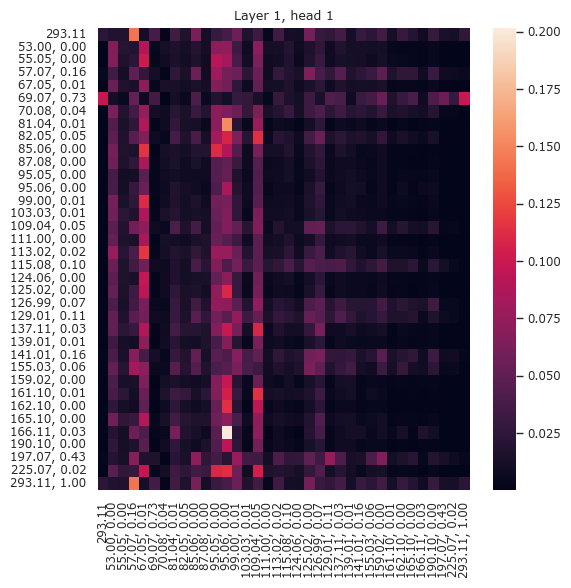

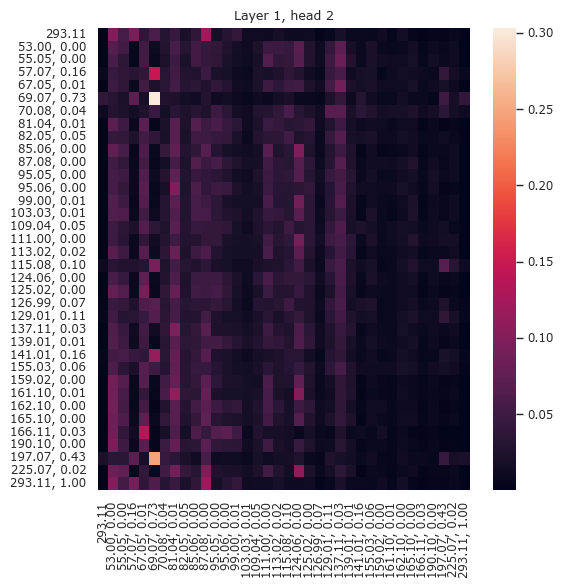

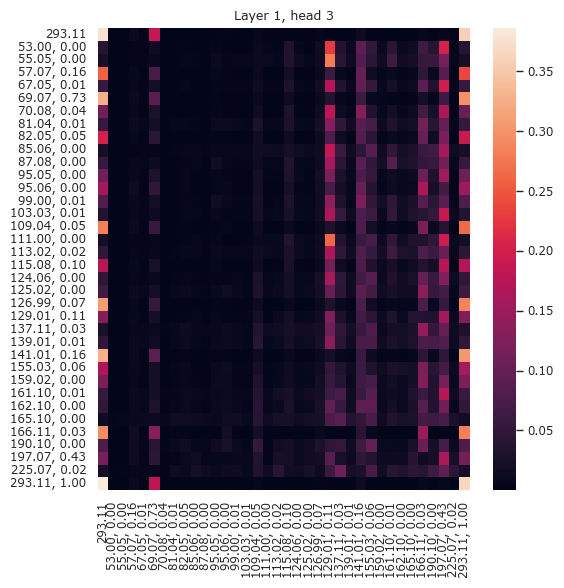

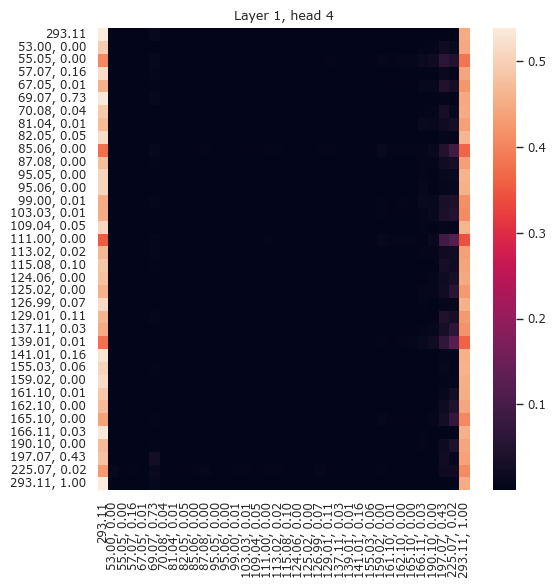

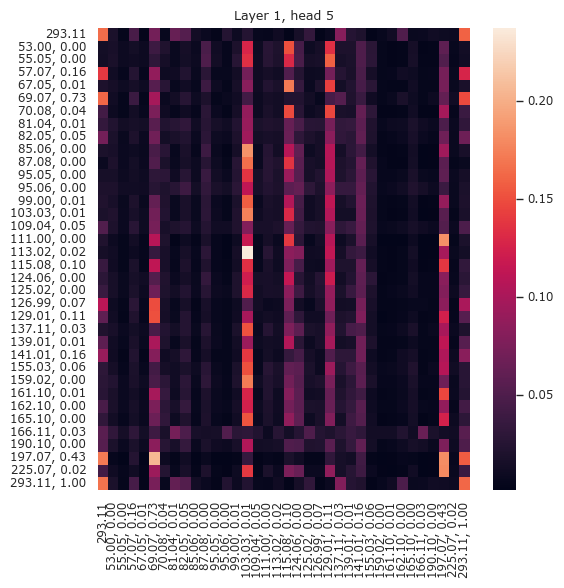

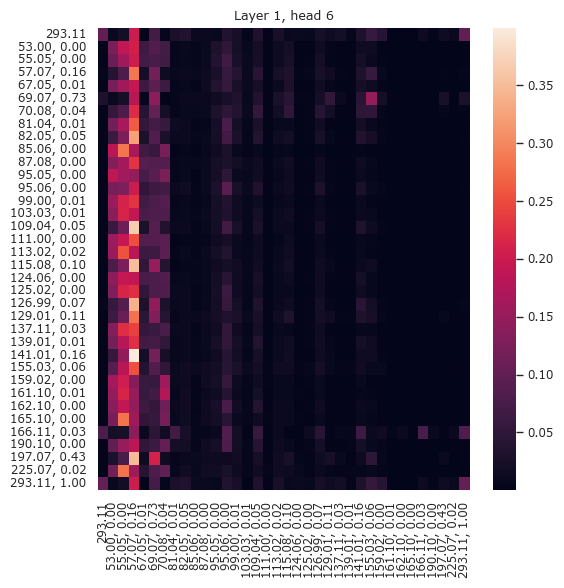

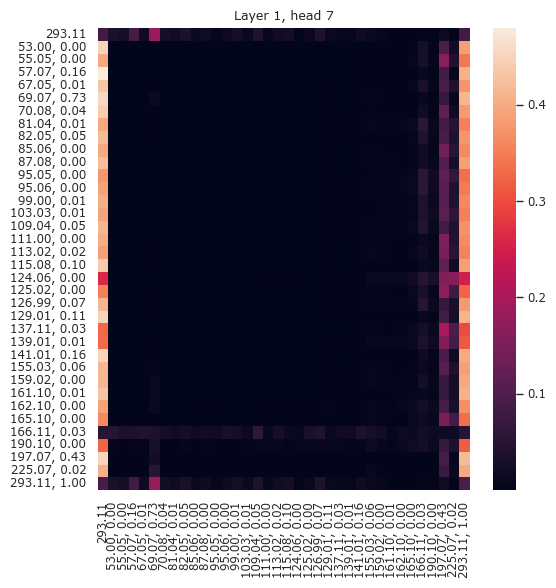

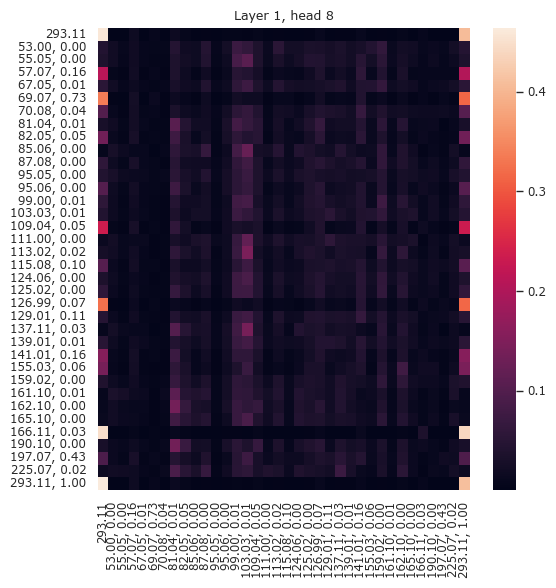

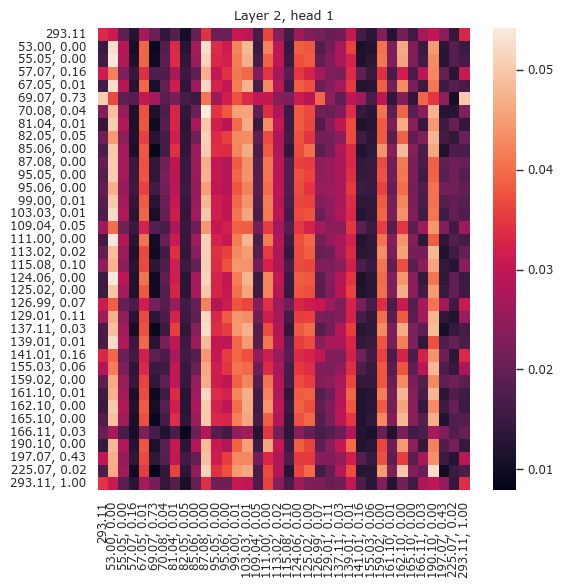

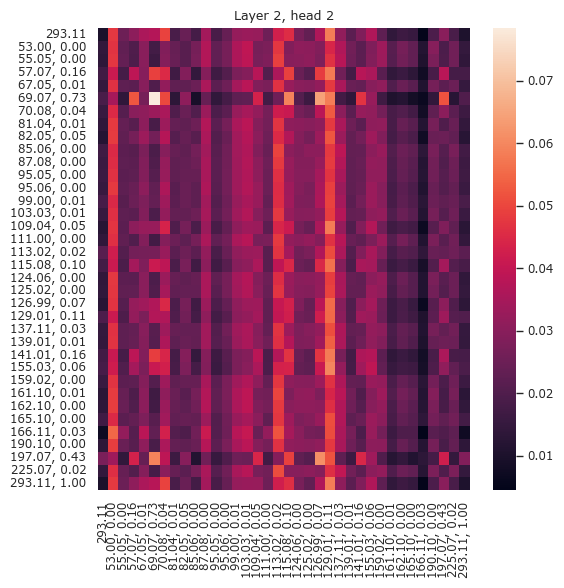

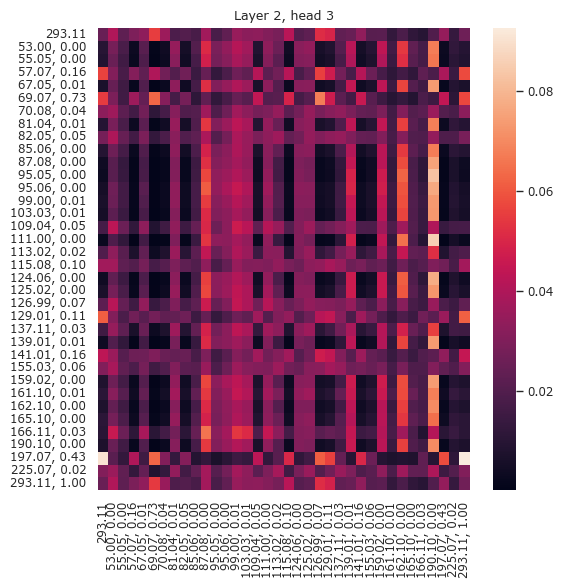

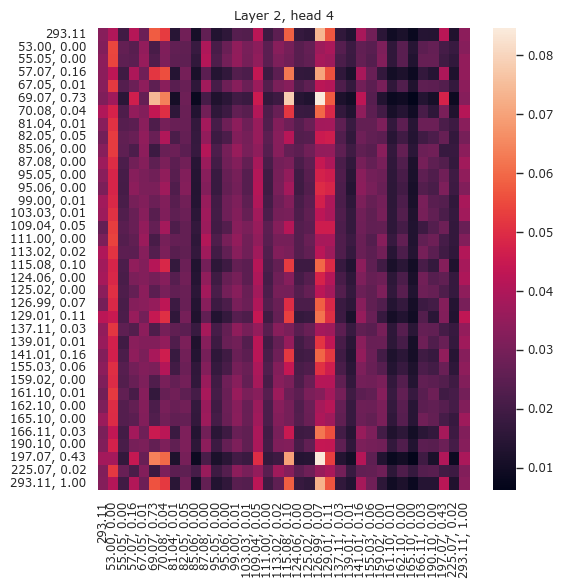

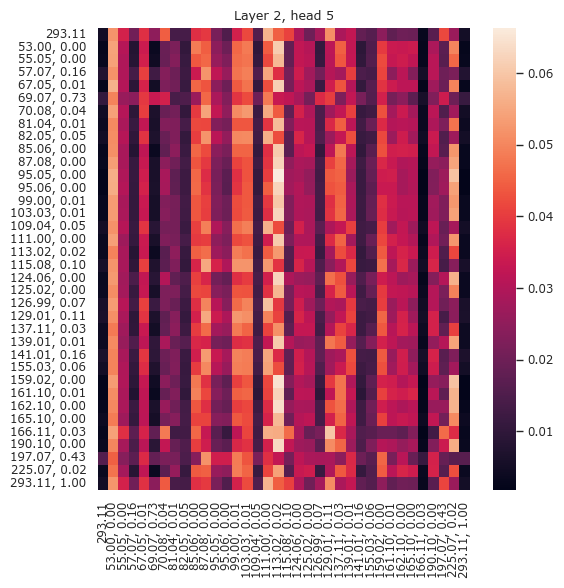

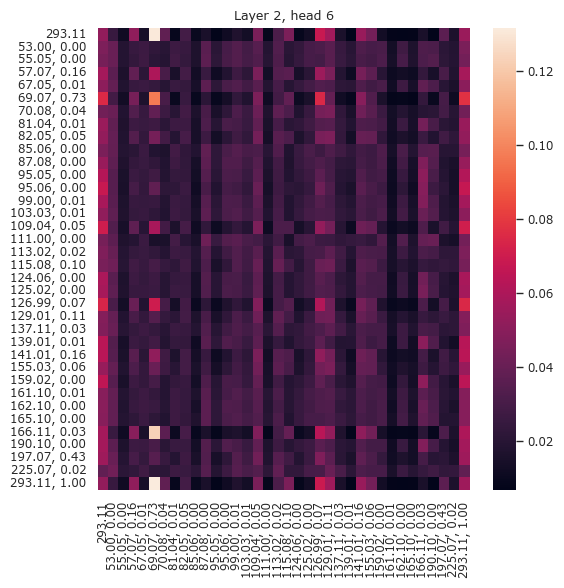

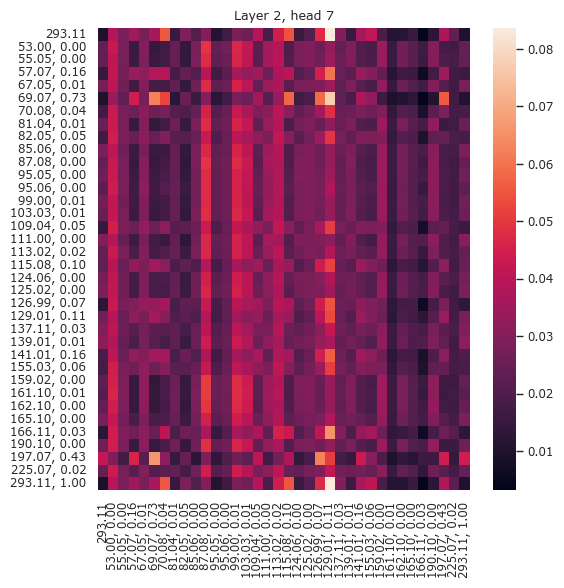

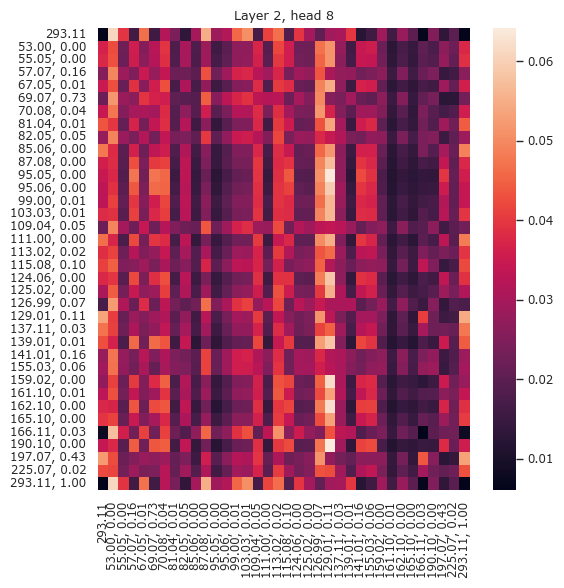

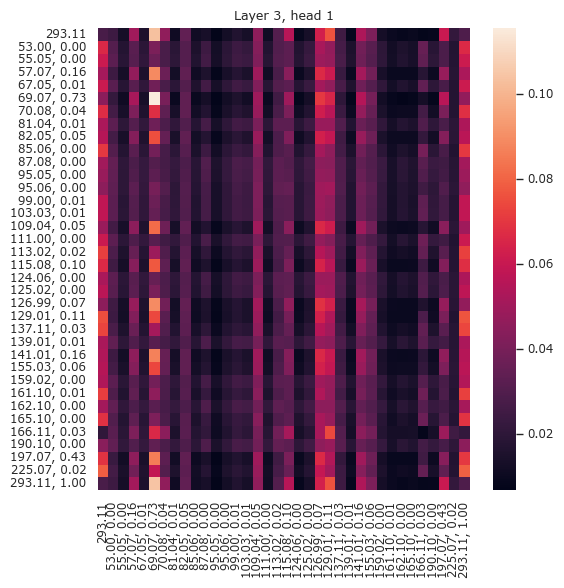

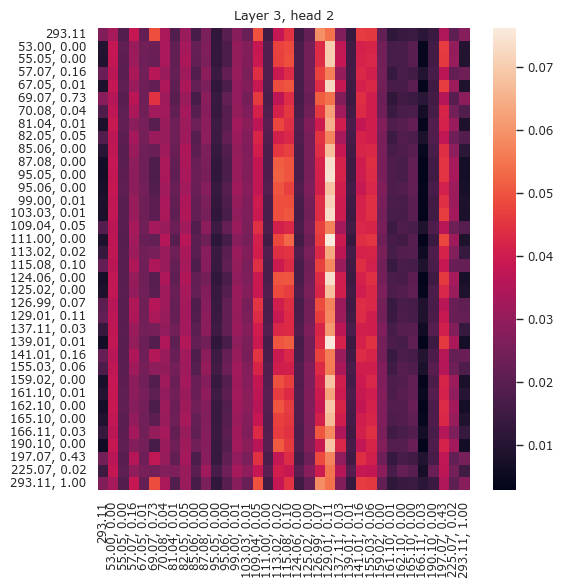

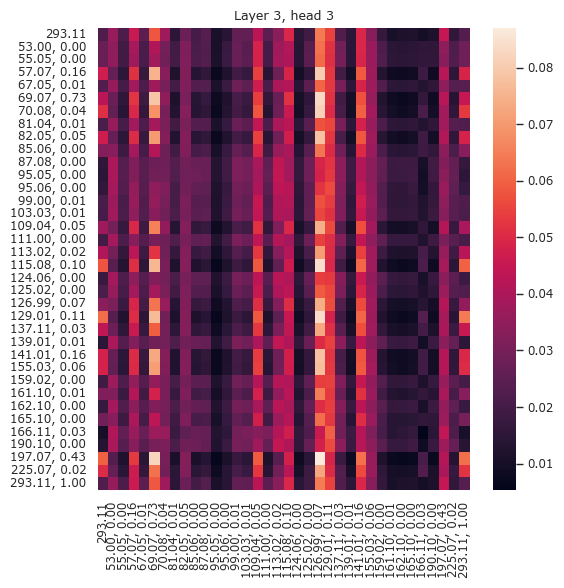

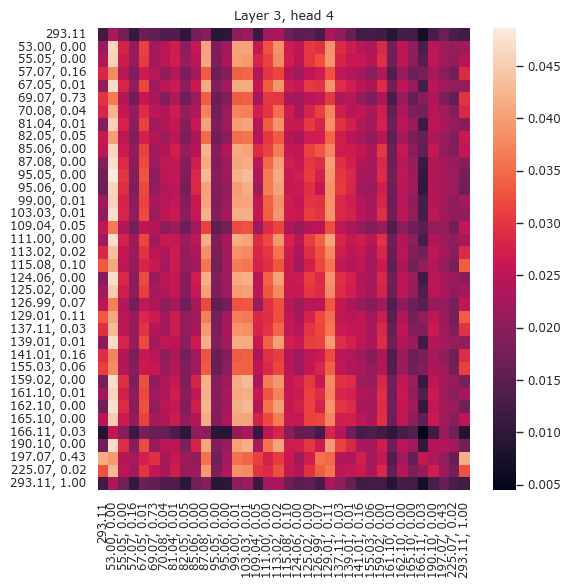

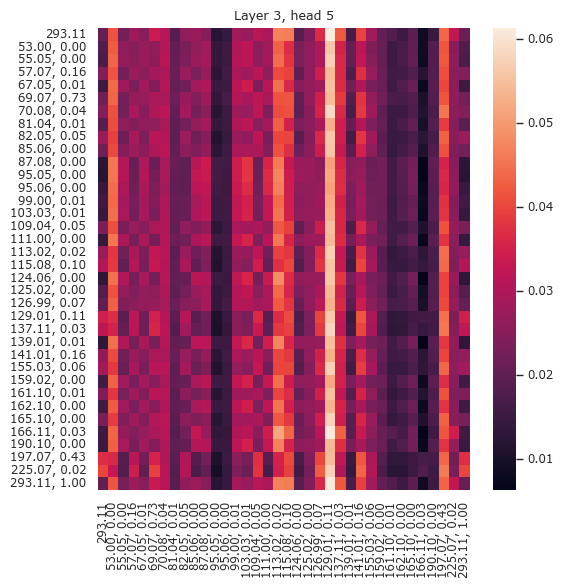

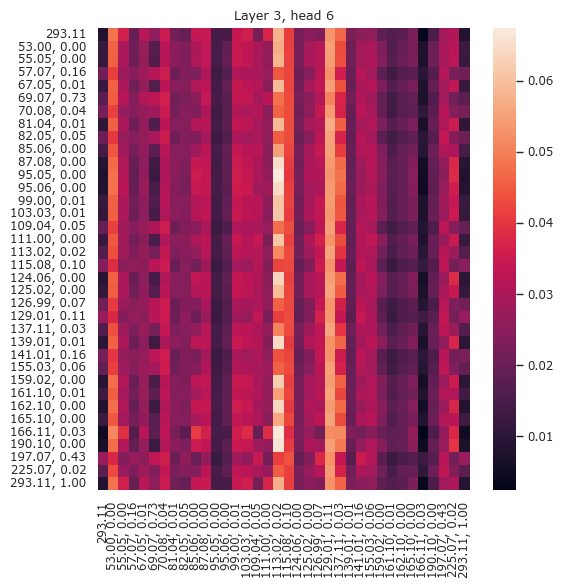

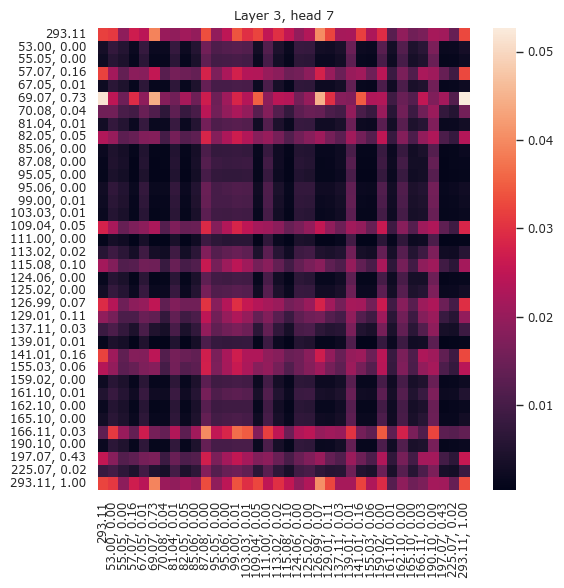

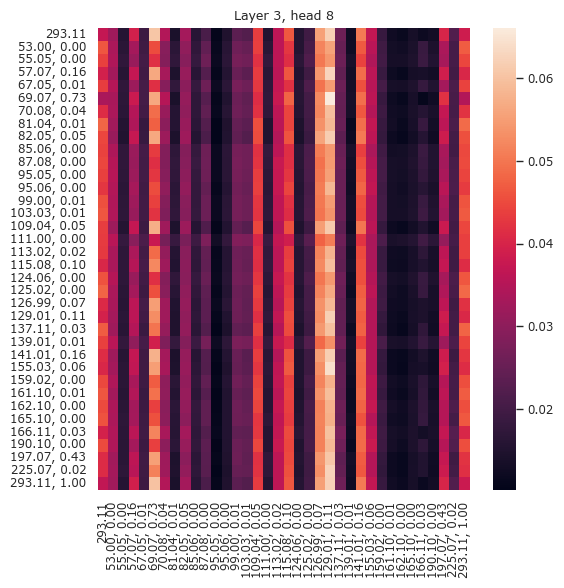

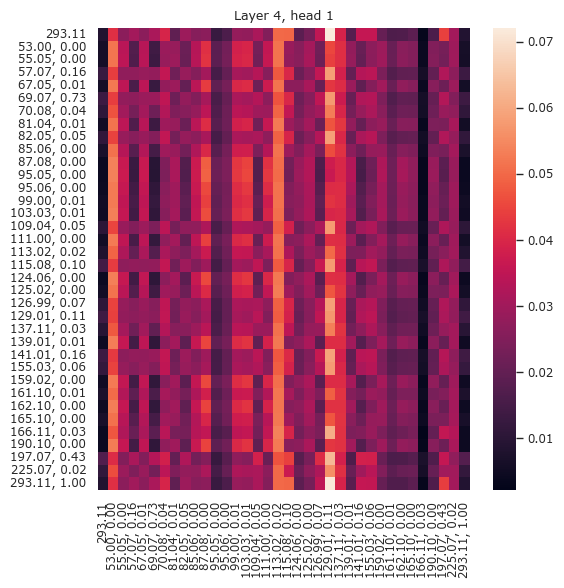

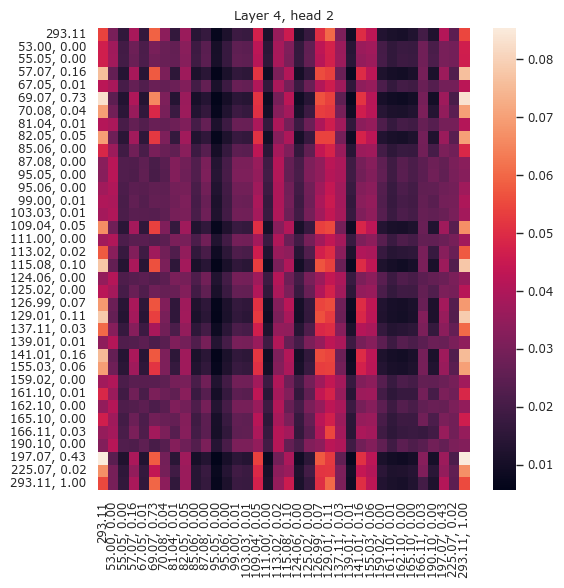

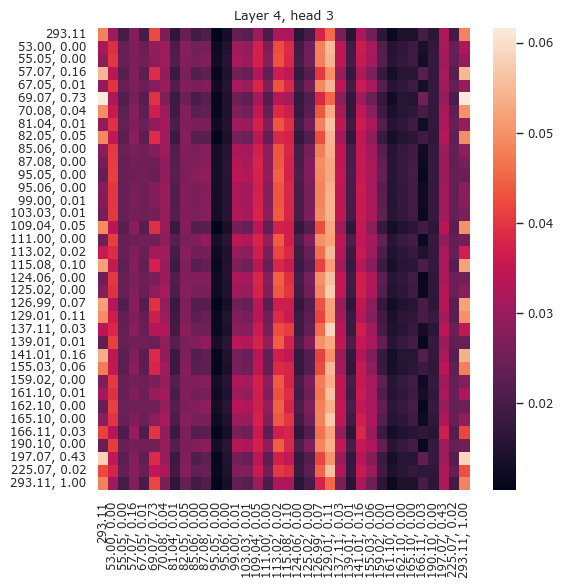

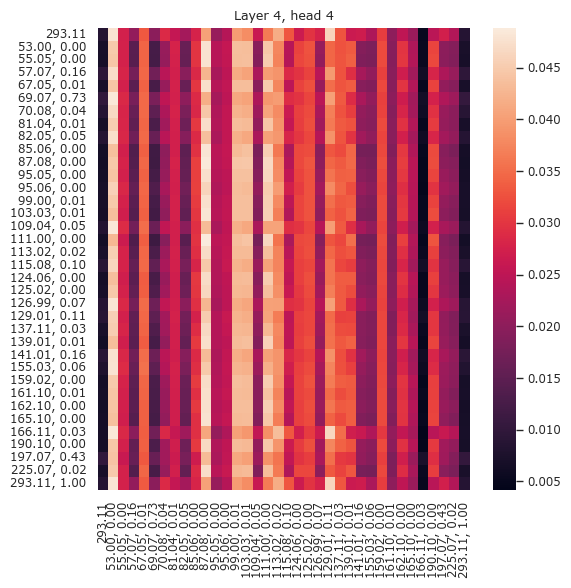

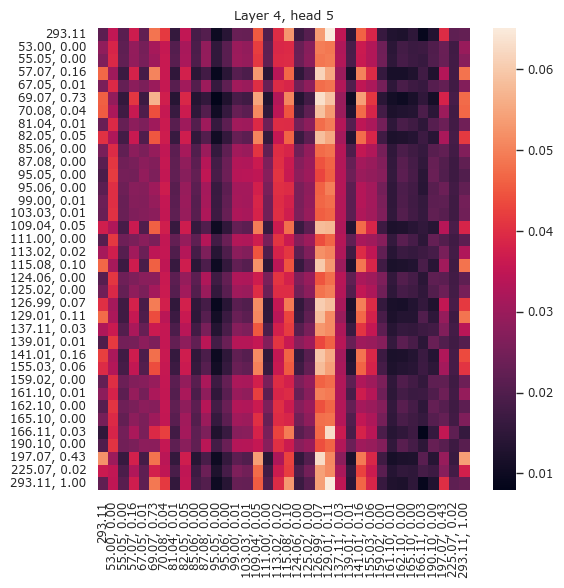

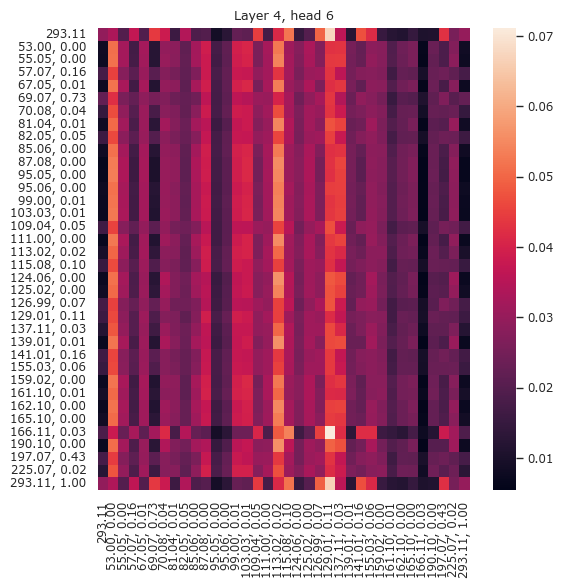

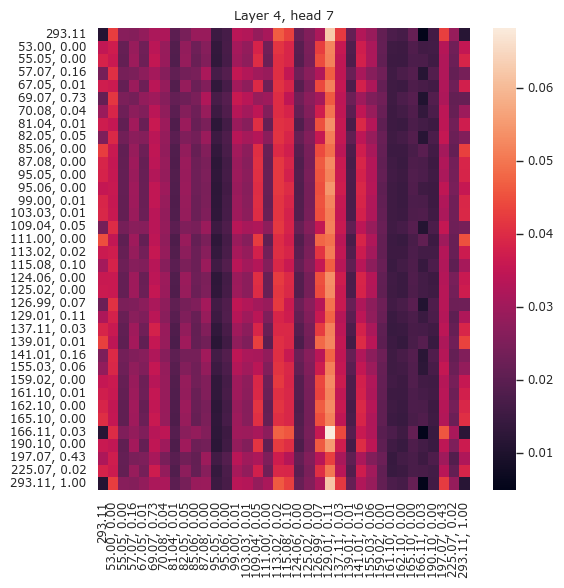

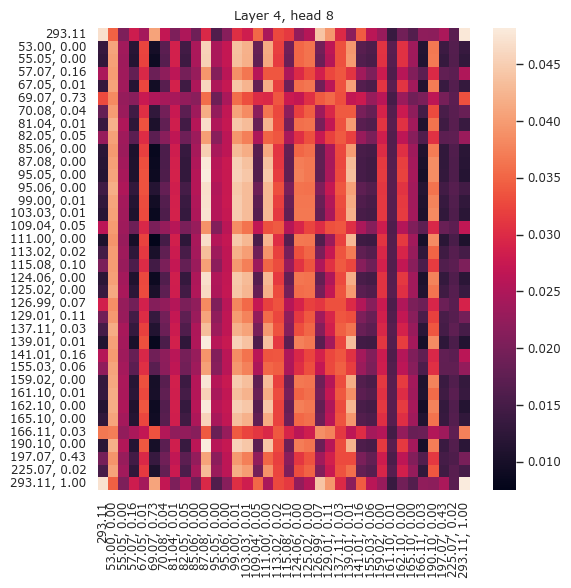

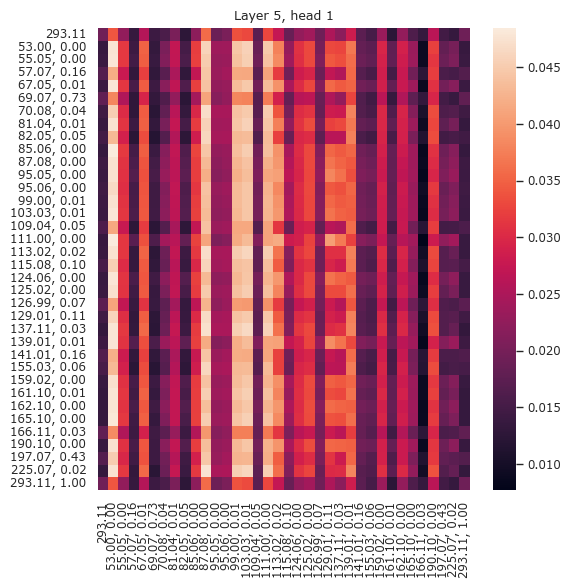

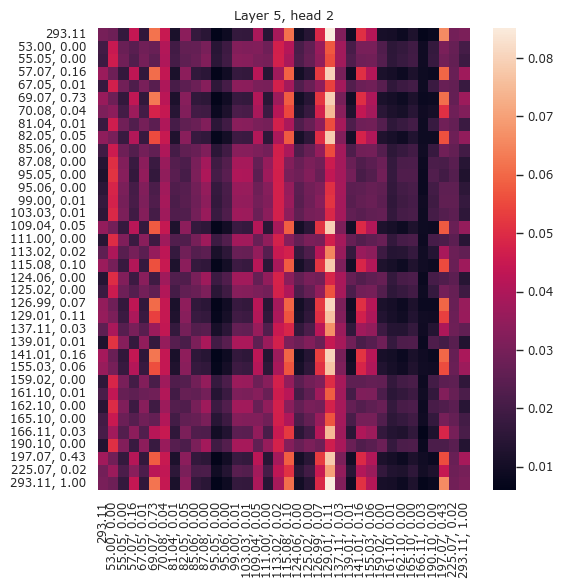

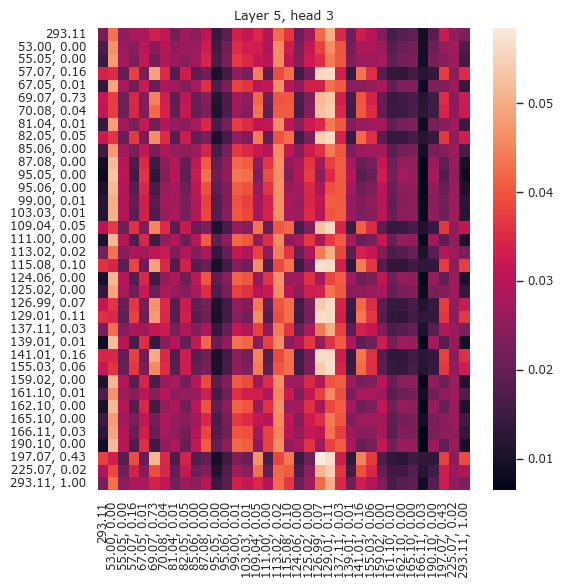

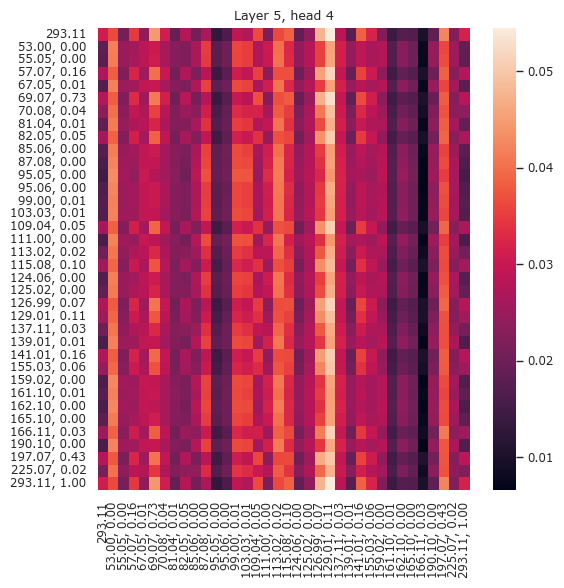

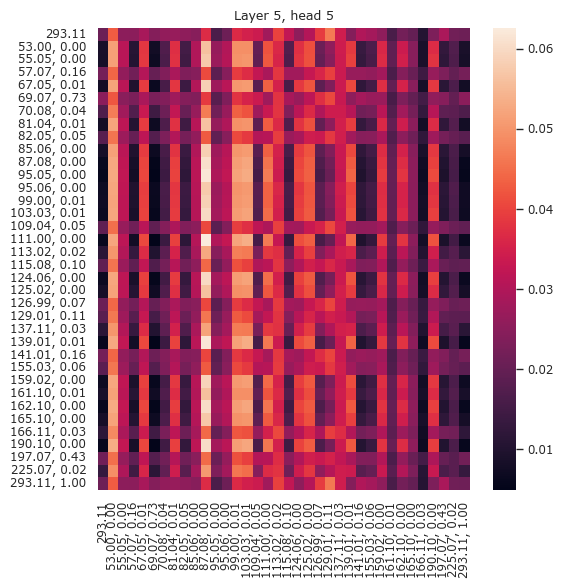

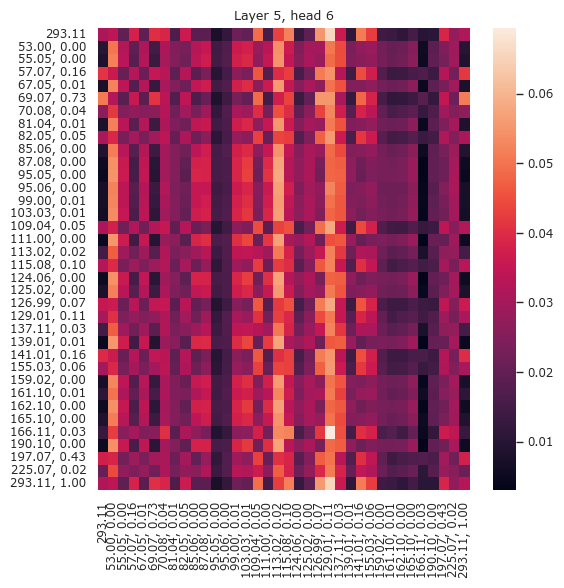

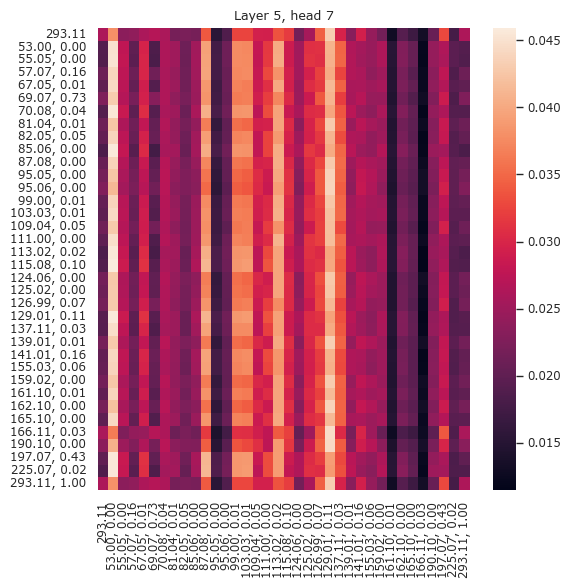

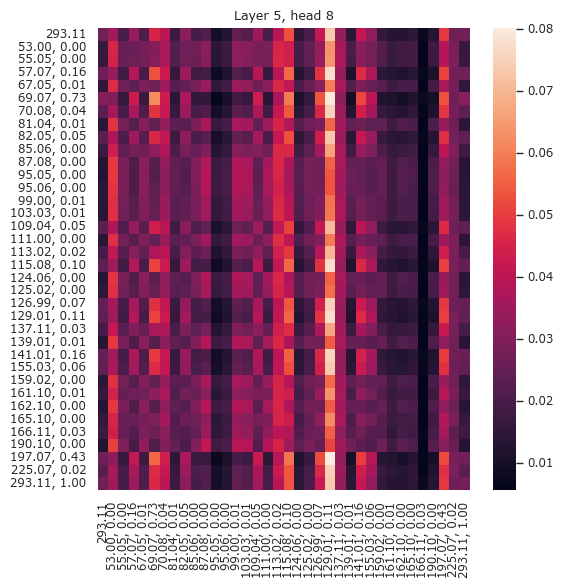

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from dreams.utils.plots import init_plotting
init_plotting(figsize=(6, 6))

# fig, axs = plt.subplots(len(attn.keys()), attn[0].shape[0], layout='constrained')
for l in attn.keys():
    for h in range(attn[l].shape[1]):
        sns.heatmap(attn[l][i, h, :n_peaks+1, :n_peaks+1].detach().numpy(), xticklabels=labels, yticklabels=labels)
        plt.title(f'Layer {l + 1}, head {h + 1}')
        plt.show()

In [60]:
i = 0
spec = df.iloc[i]['PARSED PEAKS']
n_peaks = (spec[0] != 0).sum()
labels = [f'{df.iloc[i]["PRECURSOR M/Z"]:.2f}'] + [f'{p[0]:.2f}, {p[1]:.2f}' for p in spec.T][:n_peaks]
attn_i = {l: attn[l][i, :, :n_peaks+1, :n_peaks+1].unsqueeze(0) for l in attn.keys()}
head_view(attn_i, labels)

<IPython.core.display.Javascript object>

# Attention heads

In [11]:
attn = model.get_attention_scores(data)
attn.keys(), attn[0].shape

(dict_keys([0, 1, 2, 3, 4]), torch.Size([19, 8, 61, 61]))

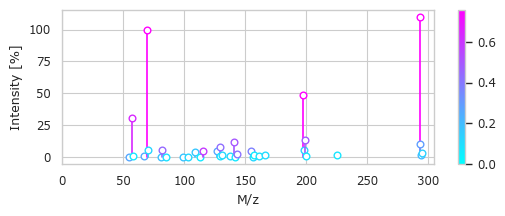

In [13]:
i = 13
n = attn[0].shape[-1]

total_attn = []
for j in range(n):
    total_attn.append(max(attn[l][i, :, :, j].max() for l in attn.keys()).item())
total_attn = torch.tensor(total_attn)

su.plot_spectrum(data['spec'][i].numpy(), hue=total_attn)#, mirror_spec=data['spec'][13], figsize=(6, 3))#, ylim=(-2, 2), xlim=(50, 100))#, xlim=(50, 100))#, ylim=(0, 0.05))

In [639]:
data['spec'][i].numpy()

array([[2.9310510e+02, 1.1000000e+00],
       [5.5053900e+01, 7.9969700e-03],
       [5.7069500e+01, 3.1254782e-01],
       [5.8072800e+01, 1.1228550e-02],
       [6.7053800e+01, 9.1037700e-03],
       [6.9069700e+01, 1.0000000e+00],
       [7.0075400e+01, 5.6914760e-02],
       [8.1044300e+01, 5.7731200e-03],
       [8.2052200e+01, 5.7618470e-02],
       [8.5064600e+01, 6.0566500e-03],
       [9.9000100e+01, 7.8330000e-03],
       [1.0303140e+02, 6.8423400e-03],
       [1.0904070e+02, 4.0510900e-02],
       [1.1301630e+02, 8.0652900e-03],
       [1.1507690e+02, 4.7821250e-02],
       [1.2699440e+02, 5.0222730e-02],
       [1.2899100e+02, 1.3903310e-02],
       [1.2901000e+02, 8.3928860e-02],
       [1.3100690e+02, 2.2440010e-02],
       [1.3710690e+02, 1.4849560e-02],
       [1.4100970e+02, 1.2214418e-01],
       [1.4201280e+02, 8.2155900e-03],
       [1.4300640e+02, 2.9709360e-02],
       [1.5502500e+02, 5.4202420e-02],
       [1.5602860e+02, 5.1274900e-03],
       [1.5702190e+02, 1.